#**K-Means**

Akan dikelompokkan tingkat kemiskinan pada kabupaten/kota di Jawa Barat dengan menggunakan beberapa variabel/faktor terkait.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

**Data 2019** 

In [6]:
url = "https://raw.githubusercontent.com/alyafadhilah/Project-Data-Mining/main/data_2019.csv"
df1 = pd.read_csv(url)
df1

,Kab_Kota,TPT,PPM,AGK,AL,PTD_SD,PTD_SLTP,PTD_SLTA,SB_TB,SB_informal,SB_formal
0,KABUPATEN BOGOR,9.11,6.66,373799,46.80,25.19,64.67,10.14,46.70,26.82,26.49
1,KABUPATEN SUKABUMI,8.05,6.22,309676,46.73,24.41,71.30,4.29,49.10,38.47,12.43
2,KABUPATEN CIANJUR,9.81,9.15,350760,47.25,25.44,65.81,8.75,46.47,30.71,22.81
3,KABUPATEN BANDUNG,5.51,5.94,345177,59.08,12.17,71.19,16.64,53.42,22.45,24.13
4,KABUPATEN GARUT,7.35,8.98,301202,44.17,18.70,73.48,7.82,46.58,42.57,10.85
5,KABUPATEN TASIKMALAYA,6.31,9.12,311848,36.37,17.71,82.88,9.40,41.34,47.49,11.18
6,KABUPATEN CIAMIS,5.16,6.65,363750,67.41,18.38,71.16,10.46,41.06,45.09,13.84
7,KABUPATEN KUNINGAN,9.68,11.41,340775,66.20,15.62,69.87,14.51,53.42,33.05,13.53
8,KABUPATEN CIREBON,10.35,9.94,381372,67.05,33.34,48.82,17.84,47.69,35.77,16.54
9,KABUPATEN MAJALENGKA,4.37,10.06,445184,67.64,20.92,66.44,12.64,48.07,32.49,19.44


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kab_Kota     27 non-null     object 
 1   TPT          27 non-null     float64
 2   PPM          27 non-null     float64
 3   AGK          27 non-null     int64  
 4   AL           27 non-null     float64
 5   PTD_SD       27 non-null     float64
 6   PTD_SLTP     27 non-null     float64
 7   PTD_SLTA     27 non-null     float64
 8   SB_TB        27 non-null     float64
 9   SB_informal  27 non-null     float64
 10  SB_formal    27 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
#memilih variabel
df2 = df1.iloc[:, 2:11]
df2.head()

,PPM,AGK,AL,PTD_SD,PTD_SLTP,PTD_SLTA,SB_TB,SB_informal,SB_formal
0,6.66,373799,46.80,25.19,64.67,10.14,46.70,26.82,26.49
1,6.22,309676,46.73,24.41,71.30,4.29,49.10,38.47,12.43
2,9.15,350760,47.25,25.44,65.81,8.75,46.47,30.71,22.81
3,5.94,345177,59.08,12.17,71.19,16.64,53.42,22.45,24.13
4,8.98,301202,44.17,18.70,73.48,7.82,46.58,42.57,10.85


Keterangan:


1.  PPM: Persentase penduduk miskin berdasarkan kabupaten/kota di Jawa Barat
2.  AGK: Angka garis kemiskinan berdasarkan kabupaten/kota di Jawa Barat
3.  AL: Persentase rumah tangga miskin air layak berdasarkan kabupaten/kota di Jawa Barat
4.  PTD_SD: Persentase penduduk miskin usia 15 tahun ke atas yang tamat pendidikan < SD berdasarkan kabupaten/kota di Jawa Barat
5.  PTD_SLTP: Persentase penduduk miskin usia 15 tahun ke atas yang tamat pendidikan SD/SLTP berdasarkan kabupaten/kota di Jawa Barat
6.  PTD_SLTA: Persentase penduduk miskin usia 15 tahun ke atas yang tamat pendidikan SLTA+ berdasarkan kabupaten/kota di Jawa Barat
7.  SB_TB: Persentase penduduk miskin usia 15 tahun ke atas yang tidak bekerja
8.  SB_informal: Persentase penduduk miskin usia 15 tahun ke atas yang bekerja di sektor informal
9.  SB_formal: Persentase penduduk miskin usia 15 tahun ke atas yang bekerja di sektor formal






In [9]:
#mengubah variabel dari data frame ke array
df2_array = np.array(df2)
print(df2_array)

[[6.66000e+00 3.73799e+05 4.68000e+01 2.51900e+01 6.46700e+01 1.01400e+01
  4.67000e+01 2.68200e+01 2.64900e+01]
 [6.22000e+00 3.09676e+05 4.67300e+01 2.44100e+01 7.13000e+01 4.29000e+00
  4.91000e+01 3.84700e+01 1.24300e+01]
 [9.15000e+00 3.50760e+05 4.72500e+01 2.54400e+01 6.58100e+01 8.75000e+00
  4.64700e+01 3.07100e+01 2.28100e+01]
 [5.94000e+00 3.45177e+05 5.90800e+01 1.21700e+01 7.11900e+01 1.66400e+01
  5.34200e+01 2.24500e+01 2.41300e+01]
 [8.98000e+00 3.01202e+05 4.41700e+01 1.87000e+01 7.34800e+01 7.82000e+00
  4.65800e+01 4.25700e+01 1.08500e+01]
 [9.12000e+00 3.11848e+05 3.63700e+01 1.77100e+01 8.28800e+01 9.40000e+00
  4.13400e+01 4.74900e+01 1.11800e+01]
 [6.65000e+00 3.63750e+05 6.74100e+01 1.83800e+01 7.11600e+01 1.04600e+01
  4.10600e+01 4.50900e+01 1.38400e+01]
 [1.14100e+01 3.40775e+05 6.62000e+01 1.56200e+01 6.98700e+01 1.45100e+01
  5.34200e+01 3.30500e+01 1.35300e+01]
 [9.94000e+00 3.81372e+05 6.70500e+01 3.33400e+01 4.88200e+01 1.78400e+01
  4.76900e+01 3.57700e

In [10]:
#standardisasi data
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2_array)
df2_scaled

array([[0.48163694, 0.21124781, 0.16931818, 0.50990099, 0.59676705,
        0.17654987, 0.34671022, 0.32014206, 0.54683973],
       [0.43546695, 0.02465824, 0.16818182, 0.49234923, 0.74357839,
        0.01886792, 0.45870275, 0.61567732, 0.15011287],
       [0.7429171 , 0.14420732, 0.17662338, 0.51552655, 0.62201063,
        0.13908356, 0.3359776 , 0.41882293, 0.44300226],
       [0.40608604, 0.12796152, 0.36866883, 0.21692169, 0.7411426 ,
        0.35175202, 0.66028931, 0.20928463, 0.48024831],
       [0.7250787 , 0.        , 0.12662338, 0.36386139, 0.7918512 ,
        0.11401617, 0.34111059, 0.71968544, 0.10553047],
       [0.73976915, 0.03097847, 0.        , 0.34158416, 1.        ,
        0.15660377, 0.09659356, 0.84449518, 0.11484199],
       [0.48058762, 0.18200653, 0.5038961 , 0.35666067, 0.7404783 ,
        0.1851752 , 0.08352776, 0.78361238, 0.18989842],
       [0.98006296, 0.11515227, 0.48425325, 0.29455446, 0.7119132 ,
        0.29433962, 0.66028931, 0.47818366, 0.18115124],


In [11]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 2, random_state=123)
# Menentukan kluster dari data
kmeans.fit(df2_scaled)
print(kmeans.cluster_centers_)

[[0.65646496 0.17670863 0.31675685 0.40229023 0.68898238 0.20814615
  0.42920102 0.51228931 0.28296652]
 [0.3670281  0.62377971 0.73008658 0.28057806 0.48491782 0.58736149
  0.42888993 0.24547607 0.57988463]]


In [12]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "Cluster" dalam data frame 
df1["Cluster"] = kmeans.labels_
df1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0]


,Kab_Kota,TPT,PPM,AGK,AL,PTD_SD,PTD_SLTP,PTD_SLTA,SB_TB,SB_informal,SB_formal,Cluster
0,KABUPATEN BOGOR,9.11,6.66,373799,46.80,25.19,64.67,10.14,46.70,26.82,26.49,0
1,KABUPATEN SUKABUMI,8.05,6.22,309676,46.73,24.41,71.30,4.29,49.10,38.47,12.43,0
2,KABUPATEN CIANJUR,9.81,9.15,350760,47.25,25.44,65.81,8.75,46.47,30.71,22.81,0
3,KABUPATEN BANDUNG,5.51,5.94,345177,59.08,12.17,71.19,16.64,53.42,22.45,24.13,0
4,KABUPATEN GARUT,7.35,8.98,301202,44.17,18.70,73.48,7.82,46.58,42.57,10.85,0
5,KABUPATEN TASIKMALAYA,6.31,9.12,311848,36.37,17.71,82.88,9.40,41.34,47.49,11.18,0
6,KABUPATEN CIAMIS,5.16,6.65,363750,67.41,18.38,71.16,10.46,41.06,45.09,13.84,0
7,KABUPATEN KUNINGAN,9.68,11.41,340775,66.20,15.62,69.87,14.51,53.42,33.05,13.53,0
8,KABUPATEN CIREBON,10.35,9.94,381372,67.05,33.34,48.82,17.84,47.69,35.77,16.54,0
9,KABUPATEN MAJALENGKA,4.37,10.06,445184,67.64,20.92,66.44,12.64,48.07,32.49,19.44,0


Cluster pada tabel di atas menunjukkan bahwa kategori 1 cenderung ada pada kota-kota, sementara kategori 0 cenderung ada pada wilayah kabupaten. Maka, menurut variabel-variabel terkait, kategori 1 menunjukkan wilayah yang cenderung tidak menderita kemiskinan, sementara kategori 0 menunjukkan wilayah yang cenderung menderita kemiskinan.

Untuk analisis selanjutnya (pembuatan peta & decision tree), kategorik pada "Cluster" diubah menjadi "1" dan "2", dimana "1" :Kab/Kota yang cenderung tidak menderita kemiskinan dan "2":Kab/Kota yang cenderung menderita kemiskinan.

**Data 2020**

In [13]:
url = "https://raw.githubusercontent.com/alyafadhilah/Project-Data-Mining/main/data_2020.csv"
df3 = pd.read_csv(url)
df3

,Kab_Kota,TPT,PPM,AGK,AL,PTD_SD,PTD_SLTP,PTD_SLTA,SB_TB,SB_informal,SB_formal
0,KABUPATEN BOGOR,14.29,7.69,402877,47.54,30.58,53.76,15.66,50.73,24.67,24.60
1,KABUPATEN SUKABUMI,9.60,7.09,328284,41.62,10.93,75.70,13.37,56.21,28.04,15.75
2,KABUPATEN CIANJUR,11.05,10.36,371699,39.23,16.58,71.37,12.05,53.03,35.45,11.52
3,KABUPATEN BANDUNG,8.58,6.91,367403,77.91,4.77,77.39,17.84,57.08,12.03,30.90
4,KABUPATEN GARUT,8.95,9.98,310437,48.10,15.80,67.85,16.34,52.79,33.31,13.91
5,KABUPATEN TASIKMALAYA,7.12,10.34,323880,40.58,14.64,75.33,10.04,40.19,41.08,18.73
6,KABUPATEN CIAMIS,5.66,7.62,378108,50.74,12.22,78.66,9.12,39.48,45.30,15.22
7,KABUPATEN KUNINGAN,11.22,12.82,352358,60.58,18.03,70.24,11.73,58.63,27.91,13.46
8,KABUPATEN CIREBON,11.52,11.24,393452,57.39,30.89,47.61,21.49,47.89,36.27,15.83
9,KABUPATEN MAJALENGKA,5.84,11.43,453201,74.56,16.19,66.69,17.12,46.48,34.91,18.61


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kab_Kota     27 non-null     object 
 1   TPT          27 non-null     float64
 2   PPM          27 non-null     float64
 3   AGK          27 non-null     int64  
 4   AL           27 non-null     float64
 5   PTD_SD       27 non-null     float64
 6   PTD_SLTP     27 non-null     float64
 7   PTD_SLTA     27 non-null     float64
 8   SB_TB        27 non-null     float64
 9   SB_informal  27 non-null     float64
 10  SB_formal    27 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.4+ KB


In [15]:
#memilih variabel yang digunakan untuk clustering
df4 = df3.iloc[:, 2:11]
df4.head()

,PPM,AGK,AL,PTD_SD,PTD_SLTP,PTD_SLTA,SB_TB,SB_informal,SB_formal
0,7.69,402877,47.54,30.58,53.76,15.66,50.73,24.67,24.60
1,7.09,328284,41.62,10.93,75.70,13.37,56.21,28.04,15.75
2,10.36,371699,39.23,16.58,71.37,12.05,53.03,35.45,11.52
3,6.91,367403,77.91,4.77,77.39,17.84,57.08,12.03,30.90
4,9.98,310437,48.10,15.80,67.85,16.34,52.79,33.31,13.91


In [16]:
#mengubah variabel dari data frame ke array
df4_array = np.array(df4)
print(df4_array)

[[7.69000e+00 4.02877e+05 4.75400e+01 3.05800e+01 5.37600e+01 1.56600e+01
  5.07300e+01 2.46700e+01 2.46000e+01]
 [7.09000e+00 3.28284e+05 4.16200e+01 1.09300e+01 7.57000e+01 1.33700e+01
  5.62100e+01 2.80400e+01 1.57500e+01]
 [1.03600e+01 3.71699e+05 3.92300e+01 1.65800e+01 7.13700e+01 1.20500e+01
  5.30300e+01 3.54500e+01 1.15200e+01]
 [6.91000e+00 3.67403e+05 7.79100e+01 4.77000e+00 7.73900e+01 1.78400e+01
  5.70800e+01 1.20300e+01 3.09000e+01]
 [9.98000e+00 3.10437e+05 4.81000e+01 1.58000e+01 6.78500e+01 1.63400e+01
  5.27900e+01 3.33100e+01 1.39100e+01]
 [1.03400e+01 3.23880e+05 4.05800e+01 1.46400e+01 7.53300e+01 1.00400e+01
  4.01900e+01 4.10800e+01 1.87300e+01]
 [7.62000e+00 3.78108e+05 5.07400e+01 1.22200e+01 7.86600e+01 9.12000e+00
  3.94800e+01 4.53000e+01 1.52200e+01]
 [1.28200e+01 3.52358e+05 6.05800e+01 1.80300e+01 7.02400e+01 1.17300e+01
  5.86300e+01 2.79100e+01 1.34600e+01]
 [1.12400e+01 3.93452e+05 5.73900e+01 3.08900e+01 4.76100e+01 2.14900e+01
  4.78900e+01 3.62700e

In [17]:
#standardisasi data
scaler = MinMaxScaler()
df4_scaled = scaler.fit_transform(df4_array)
df4_scaled

array([[0.49809886, 0.24470758, 0.14387119, 0.84512115, 0.26700185,
        0.26158521, 0.71694733, 0.32460195, 0.47152127],
       [0.44106464, 0.04724466, 0.04137812, 0.20170269, 0.84757872,
        0.20359585, 0.91329273, 0.41114535, 0.15248738],
       [0.75190114, 0.16217304, 0.        , 0.38670596, 0.73299815,
        0.17016966, 0.79935507, 0.60143811, 0.        ],
       [0.42395437, 0.15080065, 0.66966759, 0.        , 0.89229955,
        0.31678906, 0.94446435, 0.        , 0.69863014],
       [0.71577947, 0.        , 0.15356648, 0.36116568, 0.63985181,
        0.27880476, 0.790756  , 0.54648177, 0.08615717],
       [0.75      , 0.03558637, 0.02337258, 0.32318271, 0.83778777,
        0.1192707 , 0.33930491, 0.74601952, 0.25991348],
       [0.49144487, 0.17913897, 0.19927285, 0.24394237, 0.92590632,
        0.09597366, 0.313866  , 0.85439137, 0.1333814 ],
       [0.98574144, 0.11097346, 0.36963296, 0.43418468, 0.70309606,
        0.16206635, 1.        , 0.40780688, 0.06993511],


In [18]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 2, random_state=123)
# Menentukan kluster dari data
kmeans.fit(df4_scaled)
print(kmeans.cluster_centers_)

[[0.26887561 0.64627147 0.70350218 0.22841239 0.22099573 0.78251275
  0.62281824 0.31300902 0.58250077]
 [0.67262357 0.212251   0.30567001 0.409463   0.62607833 0.25487465
  0.6681297  0.47596302 0.30812906]]


In [19]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df3["Cluster"] = kmeans.labels_
df3

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1]


,Kab_Kota,TPT,PPM,AGK,AL,PTD_SD,PTD_SLTP,PTD_SLTA,SB_TB,SB_informal,SB_formal,Cluster
0,KABUPATEN BOGOR,14.29,7.69,402877,47.54,30.58,53.76,15.66,50.73,24.67,24.60,1
1,KABUPATEN SUKABUMI,9.60,7.09,328284,41.62,10.93,75.70,13.37,56.21,28.04,15.75,1
2,KABUPATEN CIANJUR,11.05,10.36,371699,39.23,16.58,71.37,12.05,53.03,35.45,11.52,1
3,KABUPATEN BANDUNG,8.58,6.91,367403,77.91,4.77,77.39,17.84,57.08,12.03,30.90,1
4,KABUPATEN GARUT,8.95,9.98,310437,48.10,15.80,67.85,16.34,52.79,33.31,13.91,1
5,KABUPATEN TASIKMALAYA,7.12,10.34,323880,40.58,14.64,75.33,10.04,40.19,41.08,18.73,1
6,KABUPATEN CIAMIS,5.66,7.62,378108,50.74,12.22,78.66,9.12,39.48,45.30,15.22,1
7,KABUPATEN KUNINGAN,11.22,12.82,352358,60.58,18.03,70.24,11.73,58.63,27.91,13.46,1
8,KABUPATEN CIREBON,11.52,11.24,393452,57.39,30.89,47.61,21.49,47.89,36.27,15.83,1
9,KABUPATEN MAJALENGKA,5.84,11.43,453201,74.56,16.19,66.69,17.12,46.48,34.91,18.61,1


Cluster pada tabel di atas menunjukkan bahwa kategori 0 cenderung ada pada kota-kota, sementara kategori 1 cenderung ada pada wilayah kabupaten. Maka, menurut variabel-variabel terkait, kategori 0 menunjukkan wilayah yang cenderung tidak menderita kemiskinan, sementara kategori 1 menunjukkan wilayah yang cenderung menderita kemiskinan.

Untuk analisis selanjutnya (pembuatan peta & decision tree), kategorik pada "Cluster" diubah menjadi "1" dan "2", dimana "1" :Kab/Kota yang cenderung tidak menderita kemiskinan dan "2":Kab/Kota yang cenderung menderita kemiskinan.

# **Peta Cluster Kemiskinan di Jawa Barat**

In [20]:
#import libraries
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 54.3 MB/s 
     |████████████████████████████████| 15.4 MB 62.0 MB/s 


In [21]:
#Importing required libraries
import geopandas as gpd
import json
import altair as alt
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

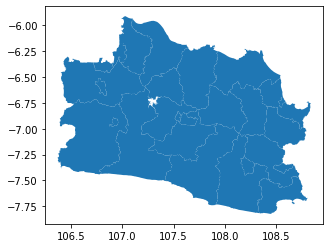

In [22]:
gdf = gpd.read_file('/vsicurl/https://raw.githubusercontent.com/alyafadhilah/Project-Data-Mining/main/shp_jabar.shp')
gdf.head()
gdf.plot()

In [23]:
gdf

,PROVNO,KABKOTNO,PROVINSI,KABKOT,split_id,geometry
0,32,01,JAWA BARAT,KABUPATEN BOGOR,1,"POLYGON ((106.99397 -6.36713, 106.99400 -6.367..."
1,32,02,JAWA BARAT,KABUPATEN SUKABUMI,1,"POLYGON ((106.96516 -6.77034, 106.96615 -6.771..."
2,32,03,JAWA BARAT,KABUPATEN CIANJUR,1,"POLYGON ((107.28434 -6.70701, 107.28434 -6.707..."
3,32,04,JAWA BARAT,KABUPATEN BANDUNG,1,"POLYGON ((107.75000 -6.81284, 107.74991 -6.813..."
4,32,05,JAWA BARAT,KABUPATEN GARUT,1,"POLYGON ((108.12906 -7.04076, 108.12899 -7.040..."
5,32,06,JAWA BARAT,KABUPATEN TASIKMALAYA,1,"MULTIPOLYGON (((108.35489 -7.35286, 108.35487 ..."
6,32,07,JAWA BARAT,KABUPATEN CIAMIS,1,"MULTIPOLYGON (((108.44145 -7.54613, 108.44145 ..."
7,32,08,JAWA BARAT,KABUPATEN KUNINGAN,1,"POLYGON ((108.75868 -6.98365, 108.75868 -6.983..."
8,32,09,JAWA BARAT,KABUPATEN CIREBON,1,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ..."
9,32,10,JAWA BARAT,KABUPATEN MAJALENGKA,1,"POLYGON ((108.32349 -6.62080, 108.32547 -6.621..."


In [24]:
url="https://raw.githubusercontent.com/alyafadhilah/Project-Data-Mining/main/data_cluster.csv"
df = pd.read_csv(url,header=0)
df

,KABKOT,Cluster_2019,Cluster_2020
0,KABUPATEN BOGOR,2,2
1,KABUPATEN SUKABUMI,2,2
2,KABUPATEN CIANJUR,2,2
3,KABUPATEN BANDUNG,2,2
4,KABUPATEN GARUT,2,2
5,KABUPATEN TASIKMALAYA,2,2
6,KABUPATEN CIAMIS,2,2
7,KABUPATEN KUNINGAN,2,2
8,KABUPATEN CIREBON,2,2
9,KABUPATEN MAJALENGKA,2,2


In [25]:
# join the geodataframe with the csv dataframe
merged = gdf.merge(df, how='left', left_on="KABKOT", right_on="KABKOT")
merged

,PROVNO,KABKOTNO,PROVINSI,KABKOT,split_id,geometry,Cluster_2019,Cluster_2020
0,32,01,JAWA BARAT,KABUPATEN BOGOR,1,"POLYGON ((106.99397 -6.36713, 106.99400 -6.367...",2,2
1,32,02,JAWA BARAT,KABUPATEN SUKABUMI,1,"POLYGON ((106.96516 -6.77034, 106.96615 -6.771...",2,2
2,32,03,JAWA BARAT,KABUPATEN CIANJUR,1,"POLYGON ((107.28434 -6.70701, 107.28434 -6.707...",2,2
3,32,04,JAWA BARAT,KABUPATEN BANDUNG,1,"POLYGON ((107.75000 -6.81284, 107.74991 -6.813...",2,2
4,32,05,JAWA BARAT,KABUPATEN GARUT,1,"POLYGON ((108.12906 -7.04076, 108.12899 -7.040...",2,2
5,32,06,JAWA BARAT,KABUPATEN TASIKMALAYA,1,"MULTIPOLYGON (((108.35489 -7.35286, 108.35487 ...",2,2
6,32,07,JAWA BARAT,KABUPATEN CIAMIS,1,"MULTIPOLYGON (((108.44145 -7.54613, 108.44145 ...",2,2
7,32,08,JAWA BARAT,KABUPATEN KUNINGAN,1,"POLYGON ((108.75868 -6.98365, 108.75868 -6.983...",2,2
8,32,09,JAWA BARAT,KABUPATEN CIREBON,1,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ...",2,2
9,32,10,JAWA BARAT,KABUPATEN MAJALENGKA,1,"POLYGON ((108.32349 -6.62080, 108.32547 -6.621...",2,2


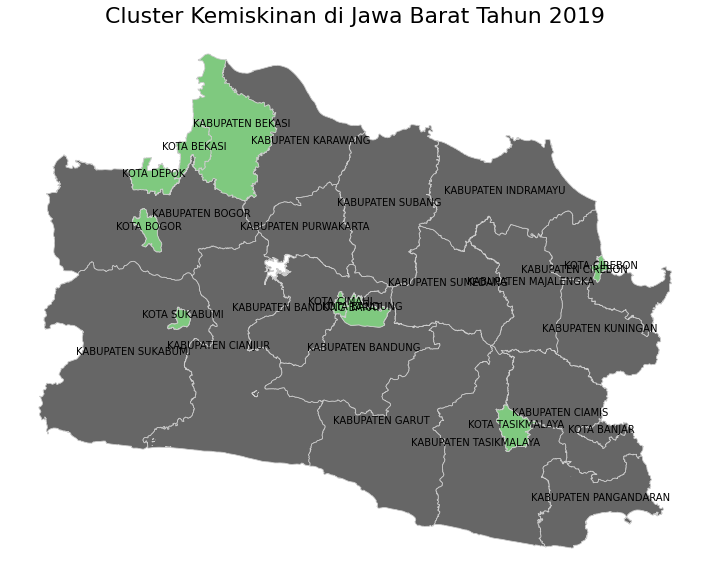

In [26]:
# set the value column that will be visualised
variable = 'Cluster_2019'
# set the range for the choropleth values
vmin, vmax = 1,2
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Cluster Kemiskinan di Jawa Barat Tahun 2019', fontdict={'fontsize': '22', 'fontweight' : '3'})
# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['KABKOT'], xy=row['coords'],horizontalalignment='center')
# create map
merged.plot(column=variable, cmap='Accent', linewidth=0.8, ax=ax, edgecolor='0.8')


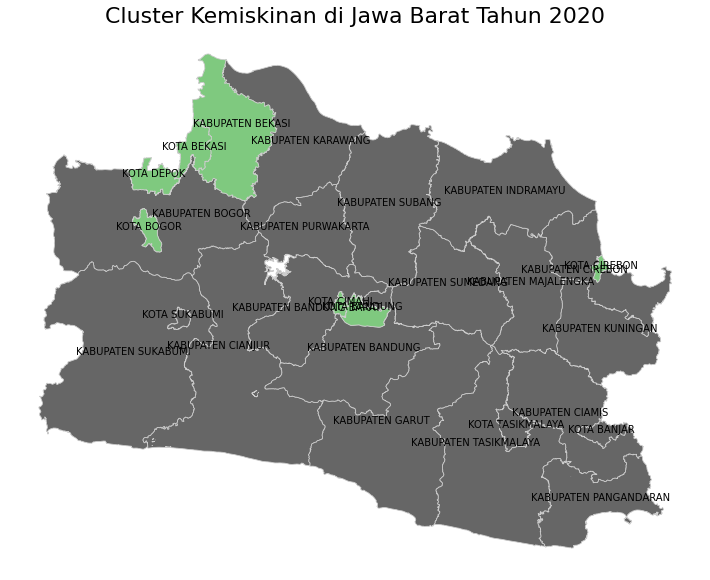

In [27]:
# set the value column that will be visualised
variable = 'Cluster_2020'
# set the range for the choropleth values
vmin, vmax = 1,2
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Cluster Kemiskinan di Jawa Barat Tahun 2020', fontdict={'fontsize': '22', 'fontweight' : '3'})
# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['KABKOT'], xy=row['coords'],horizontalalignment='center')
# create map
merged.plot(column=variable, cmap='Accent', linewidth=0.8, ax=ax, edgecolor='0.8')
